In [ ]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
from google.colab import drive
drive.mount('/content/drive')
drive_path = '/content/drive/MyDrive/PFA' 

Mounted at /content/drive


In [ ]:
path = os.path.join("/content/drive/MyDrive/PFA/single_resnet50_70/Blast_PCRM_R12-0221a ROI.bmp")

In [ ]:
import cv2

y=cv2.imread(path, cv2.IMREAD_GRAYSCALE)
print(y.shape)

(256, 256)


In [ ]:
import csv
pathcsv = os.path.join("/content/drive/MyDrive/PFA/new_data/real_size.csv")
filecsv = open(pathcsv)
print(filecsv)

<_io.TextIOWrapper name='/content/drive/MyDrive/PFA/new_data/real_size.csv' mode='r' encoding='UTF-8'>


In [ ]:
def load_img(path):
    s = f"{path}"
    return (s)

In [ ]:
s=load_img(path)

In [ ]:
y=cv2.imread(s, cv2.IMREAD_GRAYSCALE)
print(y.shape)

(256, 256)


In [ ]:
real_sizes = csv.reader(filecsv)
print(real_sizes)

elem='Blast_PCRM_R12-0221a.bmp'
for row in real_sizes:
    #print(row)
    if row[0]==elem :
      original_height= int(row[1])
      original_width= int(row[2])

'''
print(rows)
nb=len(rows) # nb ofimages = of 
'''
'''
for r in rows:
    name=r[0]#name of image
    h=r[1]#height
    w=r[2]#width

'''

#remember: new data file names have 'ROI' in them
#either sort both files when reading 
#(sort elems of csv and images of newdat> results_resnet50 )
# or find common string



'\nfor r in rows:\n    name=r[0]#name of image\n    h=r[1]#height\n    w=r[2]#width\n\n'

In [4]:
import numpy as np

In [ ]:
def feature(img,val):
  
  #I'm only constructing the image in case we need perimeter (contour detection) or something later
  
  area=0
  for x in range(h):
    for y in range(w):
      if img[x,y]==val:
        
        area+=1#nb pixels
      
  return area

In [ ]:
print(y.shape)
imagef = cv2.resize(y, (original_width, original_height), interpolation = cv2.INTER_NEAREST)
print(imagef.shape)

(256, 256)
(413, 478)


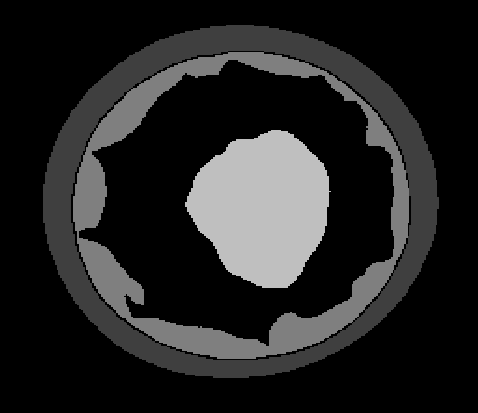

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(imagef)

In [ ]:
#this part just shows the nb of pixels with a specific colour
colours, counts = np.unique(imagef.reshape(-1,1), axis=0, return_counts=1)
# Iterate through unique colours
for index, colour in enumerate(colours):
    count = counts[index]
    print(f"   Colour: {colour}, count: {count}")

   Colour: [0], count: 136028
   Colour: [63], count: 26133
   Colour: [127], count: 18937
   Colour: [191], count: 16316


In [ ]:
def justZP(img):
  img[img>63]=0
  cv2_imshow(img)
  return img

In [ ]:
def justTE(img):
  img[img<127]=0
  img[img>127]=0
  cv2_imshow(img)
  return img

In [ ]:
def makepolar(zone):
  img=zone.copy()
  
  '''https://stackoverflow.com/questions/51675940/converting-an-image-from-cartesian-to-polar-limb-darkening'''
  value = np.sqrt(((img.shape[0]/2.0)**2.0)+((img.shape[1]/2.0)**2.0))
  polar_image = cv2.linearPolar(img,(img.shape[0]/2, img.shape[1]/2), value, cv2.WARP_FILL_OUTLIERS)
  polar_image = polar_image.astype(np.uint8)
  cv2_imshow(polar_image)
  
  #please check
  '''https://docs.opencv.org/3.4.2/da/d54/group__imgproc__transform.html#ga49481ab24fdaa0ffa4d3e63d14c0d5e4'''
  
  return(polar_image)


In [ ]:
def circle1(imagef):
  img2=imagef.copy()
  '''https://stackoverflow.com/questions/42206042/ellipse-detection-in-opencv-python'''
  #--- First obtain the threshold using the greyscale image ---
  ret,th = cv2.threshold(img2,63,255, 0)
  contours,hierarchy = cv2.findContours(th,2,1)
  cnt = contours
  big_contour = []
  max = 0
  for i in cnt:
    area = cv2.contourArea(i) #--- find the contour having biggest area ---
    if(area > max):
        max = area
        big_contour = i 

  final = cv2.drawContours(imagef, big_contour, -1, (255,255,255), 1)

  return final

In [ ]:
def circle2(imagef):
    
    img=imagef.copy()
    circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT, 1, 100, param1= 100, param2=20, minRadius=110, maxRadius=200)
    circles = np.uint16(np.around(circles))

    for i in circles[0,:]:
        # draw the outer circle
        cv2.circle(img,(i[0],i[1]),i[2],(255,255,255),1)
        # draw the center of the circle
        cv2.circle(img,(i[0],i[1]),2,(255,255,255),1)

    #print(circles)

    return(img)

In [ ]:
def circle3(img):
      output=img.copy()
      '''https://pyimagesearch.com/2014/07/21/detecting-circles-images-using-opencv-hough-circles/'''
      circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1.2, 100)
      if circles is not None:
          # convert the (x, y) coordinates and radius of the circles to integers
          circles = np.round(circles[0, :]).astype("int")
          # loop over the (x, y) coordinates and radius of the circles
          for (x, y, r) in circles:
              # draw the circle in the output image, then draw a rectangle
              # corresponding to the center of the circle
              cv2.circle(output, (x, y), r, (255, 255, 255), 4)
              cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)

      return(output)


In [ ]:
def keepOutline(image):
    #only keep circle and its center
    img=image.copy()
    img[img<255]=0
    return img

In [ ]:
'''https://pyimagesearch.com/2016/02/01/opencv-center-of-contour/'''

def Average_thickness(imagef,cx,cy,grayValue):
    h_c=cx
    w_c=cy
    
    height=0
    radius=0
    width=0
    nb=0
    while (width<=w_c) :
        if imagef[h_c,width]!=0 :
          radius=radius+1
        width=width+1

    width=0
    zone_right=0
    while(width<=w_c) :
      if imagef[h_c,width]==grayValue :
          zone_right=zone_right+1
      width=width+1

    width=w_c
    zone_left=0
    while(width<w_c) :
      if imagef[h_c,width]==grayValue :
          zone_left=zone_left+1
      width=width+1

    height=0
    zone_high=0
    while (height<=h_c) :
        if imagef[height,w_c]==grayValue :
          zone_high=zone_high+1
        height=height+1

    height=h_c
    zone_down=0
    while (height<h) :
        if imagef[height,w_c]==grayValue :
          zone_down=zone_down+1
        height=height+1

    average_thickness=(zone_down+zone_high+zone_right+zone_left)/4
    print("Average thickness", average_thickness)
  
    return(average_thickness)


In [ ]:
import imutils
'''https://pyimagesearch.com/2016/02/01/opencv-center-of-contour/'''

def Blastocyst(imagef):

  img=imagef.copy()

  thresh = cv2.threshold(img, 60, 255, cv2.THRESH_BINARY)[1]
  cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
  cnts = imutils.grab_contours(cnts)

  # loop over the contours
  for c in cnts:
    # compute the center of the contour
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    
    # draw the contour and center of the shape on the image
    cv2.drawContours(img, [c], -1, (255, 255, 255), -1)
    cv2.circle(img, (cX, cY), 7, (255, 255, 255), -1)

    zp_thickness=Average_thickness(imagef,cX,cY,63)
    print("blastocyst radius", radius)
    print("Average ZP thinkness", zp_thickness)
    
  
  return(img)


blastocyst radius 34
zp thinkness 25.0


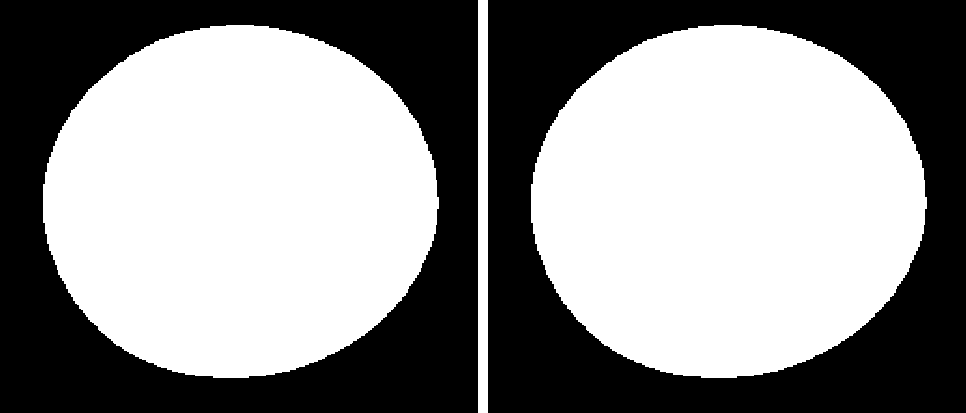

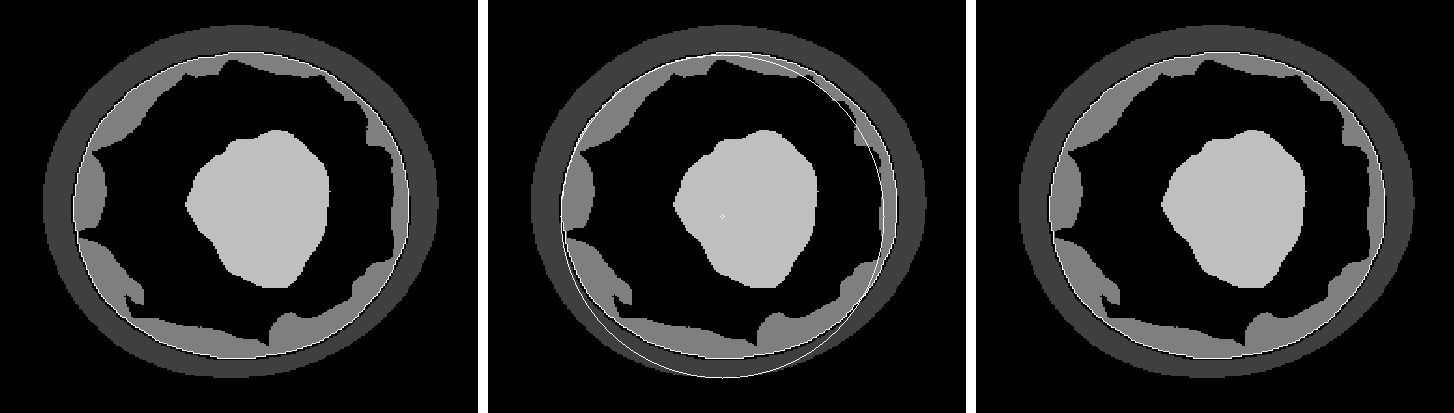

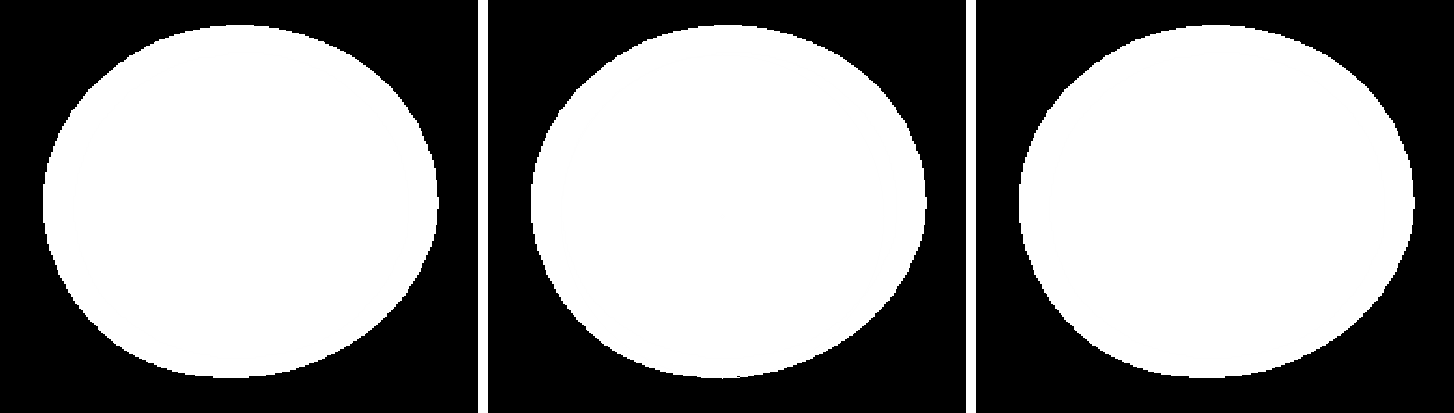

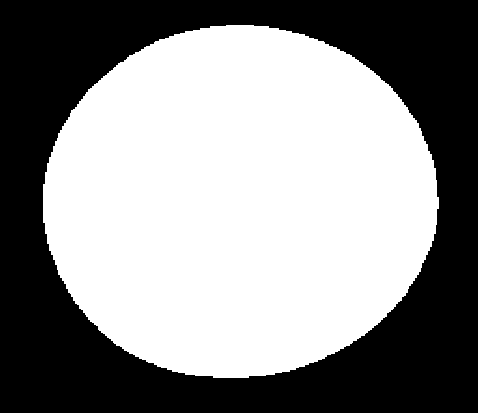

In [ ]:
h, w = imagef.shape
line = np.ones((h, 10)) * 255

img=justZP(imagef)
#imaaage=makepolar(img)
#cv2_imshow(imaaage)

image000=Blastocyst(imagef)
image00=keepOutline(image000)

final_image1 = np.concatenate([image000, line, image00], axis=1)
cv2_imshow(final_image1)

image1=circle1(imagef)
image2=circle2(imagef)
image3=circle3(imagef)

final_image = np.concatenate([image1, line, image2, line, image3], axis=1)
cv2_imshow(final_image)

image0c=keepOutline(image00)

image1c=keepOutline(image1)
image2c=keepOutline(image2)
image3c=keepOutline(image3)

x=image0c
final_image2 = np.concatenate([image1c+x, line, image2c+x, line, image3c+x], axis=1)
cv2_imshow(final_image2)
cv2_imshow(image000)

In [ ]:
#this part just shows the nb of pixels with a specific colour
colours, counts = np.unique(image0c.reshape(-1,1), axis=0, return_counts=1)
# Iterate through unique colours
for index, colour in enumerate(colours):
    count = counts[index]
    print(f"   Colour: {colour}, count: {count}")

   Colour: [0], count: 88093
   Colour: [255], count: 109321


In [ ]:
import math
radius = math.sqrt(count / math.pi)
print(radius)

186.54209998683456


In [5]:
!pip install hfda
import hfda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
def fractal_dimension():
  N = np.power(2, 15)
  X = np.sin(np.linspace(0, 1000, N))
  k_max = 5
  D = hfda.measure(X, k_max)
  return D

In [ ]:
def polarsignal(polarimg):
  

In [8]:
te=justTE(imagef)
polarTE=makepolar(te)

normTE=polarTE/radius
fractal_dimension()

1.0005565919808783